# Importing Required libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

### Loading Raw Data

In [4]:
DATA_PATH = "../data/raw/placementdata.csv"

df = pd.read_csv(DATA_PATH)


### Verifying Data Structure & Understanding

In [5]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


### Verifying Data Size

In [6]:
df.shape

(10000, 12)

### Column & data type inspection

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  str    
 8   PlacementTraining          10000 non-null  str    
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  str    
dtypes: float64(2), int64(7), str(3)
memory usage: 937.6 KB


### Data Explicit Checking (Data Leakage check)

In [8]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='str')

### TARGET ANALYSIS 
<p>
Checking that is targeted column is balanced or not
</p>
Here, <b>PlacementStatus</b> is targeted value/column

In [9]:
df['PlacementStatus'].value_counts()

PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

<b>Normalization of Targeted Values</b>

In [10]:
df['PlacementStatus'].value_counts(normalize=True)

PlacementStatus
NotPlaced    0.5803
Placed       0.4197
Name: proportion, dtype: float64

## Removing StudentID column (LEAKAGE PREVENTION)
<p>
Removing identifiers helps from data leakage.</br>
This is known as, <b>de-identification or anonymization</b>
</p>

In [11]:
df['StudentID'].nunique(), df.shape[0]

(10000, 10000)

<p>Above values tell that StudentID is unique for each student</p>

#### <b>Removing StudentID</b>

In [12]:
df = df.drop(columns=['StudentID'])

In [13]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


## <b>Numerical feature distribution analysis</b>

Identifying numerical columns

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks'],
      dtype='str')

<b>Distribution plots</b>

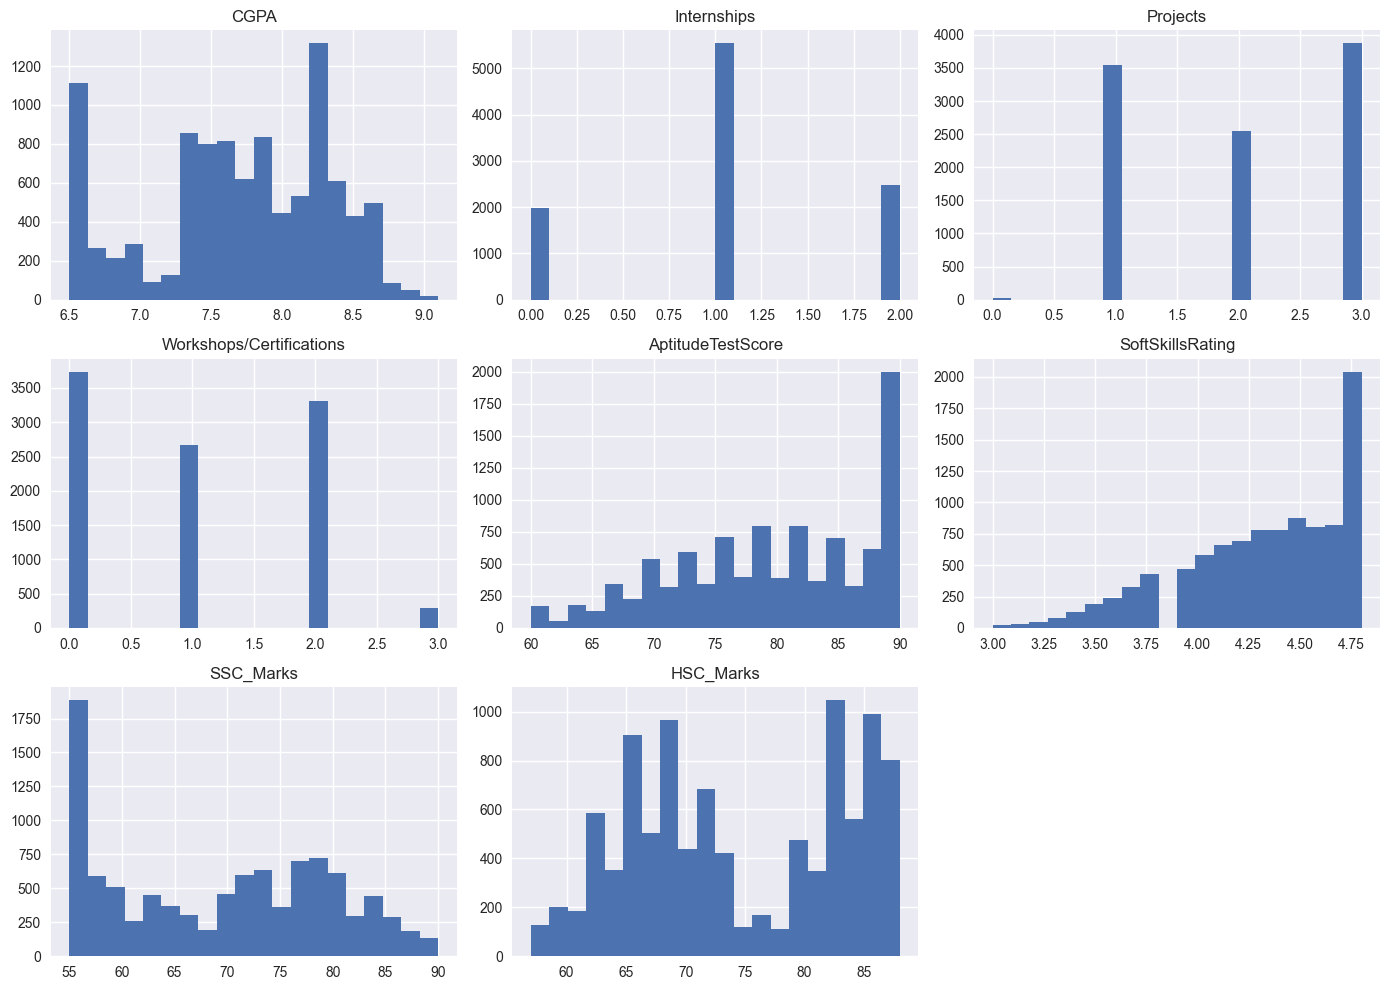

In [21]:
df[num_cols].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

<b>Outlier detection (BOXPLOTS)</b>

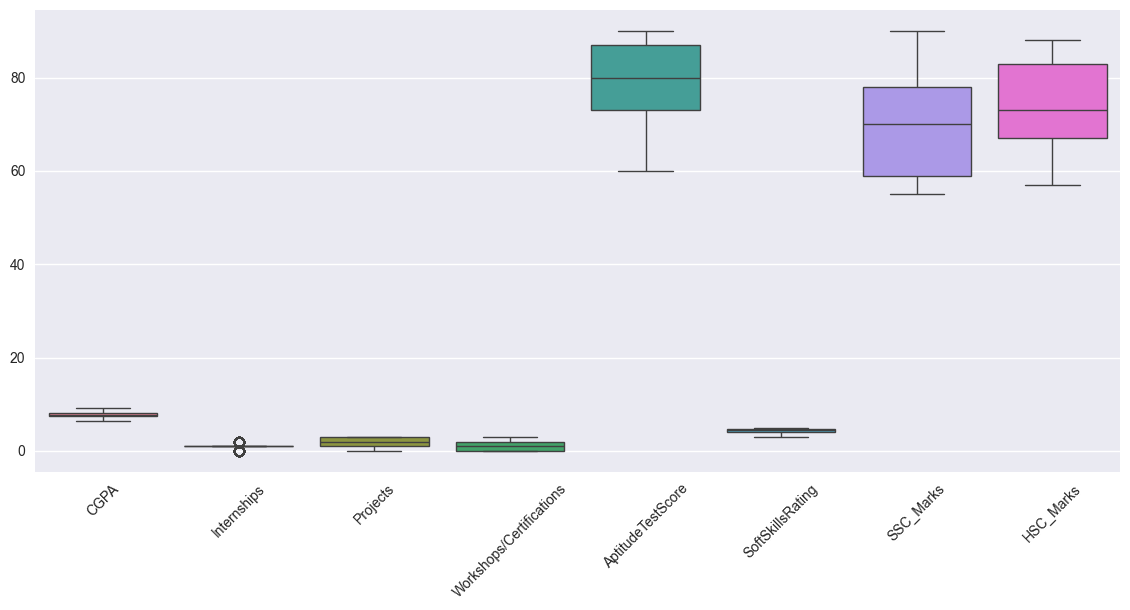

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()

## <b>Categorical / Binary features analysis</b>

Identifying categorical-like columns

In [25]:
cat_cols = df.select_dtypes(include=['object', 'string', 'bool']).columns
cat_cols

Index(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], dtype='str')

Identifying binary numeric columns

In [26]:
binary_cols = [
    col for col in df.columns
    if df[col].nunique() == 2 and col != 'PlacementStatus'
]

binary_cols


['ExtracurricularActivities', 'PlacementTraining']

### <b>Visualize binary features vs target</b>

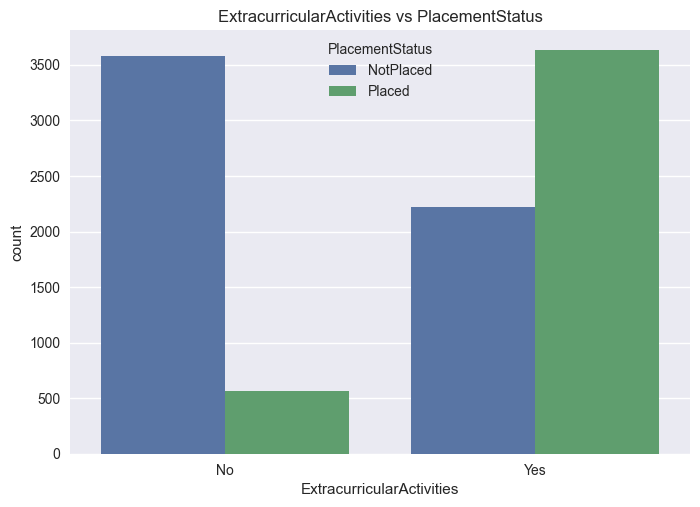

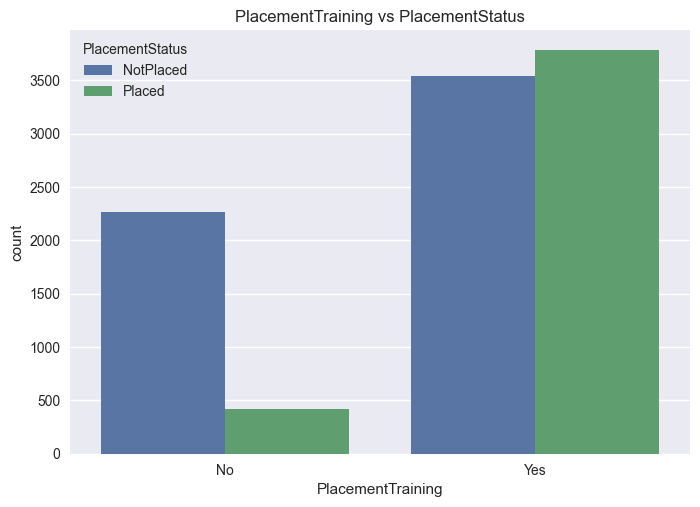

In [27]:
for col in binary_cols:
    sns.countplot(data=df, x=col, hue='PlacementStatus')
    plt.title(f"{col} vs PlacementStatus")
    plt.show()

### <b>Correlation analysis</b>

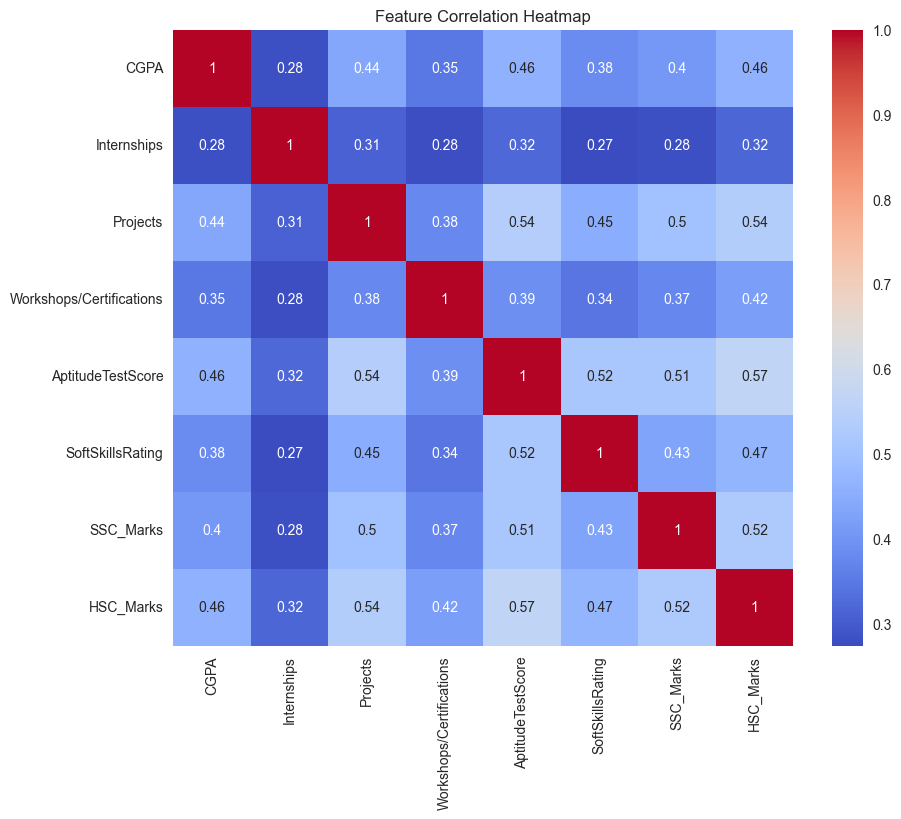

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Exploratory Data Analysis (EDA) Summary & Decisions

- Target variable `PlacementStatus` is reasonably balanced.
- `StudentID` removed due to leakage risk.
- Numerical features show varying scales → scaling required.
- Some features show moderate skewness.
- Binary features like `PlacementTraining` show strong signal.
- No severe multicollinearity detected.
